In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Chargement du dataset sur Colab 
from google.colab import files
upload = files.upload()

In [ ]:
# lecture du dataset sur Pandas
dataset = pd.read_csv("Marketing_Spending.csv")
dataset.head()

,Marketing Spending,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


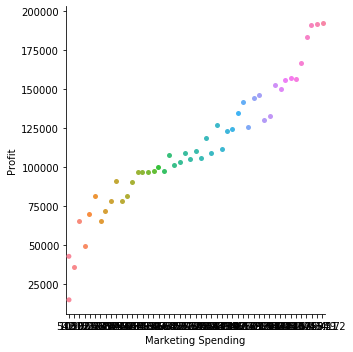

In [ ]:
# Prévisualisation des données 
### Linear Model
import seaborn as sns 
sns.catplot(x="Marketing Spending", y="Profit", data = dataset)

In [ ]:
# Gestion des valeurs manquantes 
### Voir s'il y a des valeurs manquantes 
dataset.isnull().any()

Marketing Spending    False
Profit                False
dtype: bool

In [ ]:
# Séparation des données en variables explicatives X et target y 
X = dataset[["Marketing Spending"]]
y = dataset.iloc[:,-1]

In [ ]:
# Normalisation des X
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [ ]:
# Division du dataset en train et un test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
# Création du modèle 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.intercept_
regressor.coef_

array([38698.51974041])

In [ ]:
# Evaluation du modèle 
regressor.score(X_test, y_test)

0.946458760778722

In [ ]:
# Vérifcation de l'overfitting 
print(" Score de Train : {}\n Score de Test : {}".format(regressor.score(X_train, y_train), regressor.score(X_test, y_test)))

 Score de Train : 0.9449589778363044
 Score de Test : 0.946458760778722


In [ ]:
xp = sc_X.transform([[150000]])
regressor.predict(xp)

array([176159.71764308])

---> Le train est comparable au test donc pas d'overfitting.

In [4]:
# Visualize our Training Set
plt.scatter(X_train, y_train, color="red")
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary VS Experience (training set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()


NameError: name 'plt' is not defined

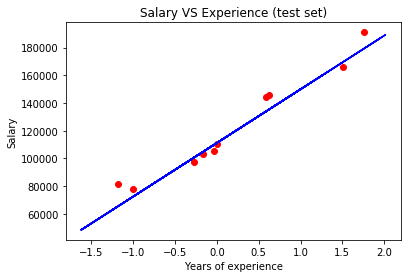

In [ ]:
## Visualize our Test Set
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary VS Experience (test set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()